# Project Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Hypothesis Generation


# Loading Packages and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Missing Value Treatment

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [9]:
df.Item_Weight.median()

12.6

In [10]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [13]:
df['Outlet_Size'] = df['Outlet_Size'].replace(np.nan, df['Outlet_Size'].mode().values[0])

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# EDA

In [15]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df = df.replace(to_replace=["LF", "low fat"],
           value="Low Fat")

In [18]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [19]:
df = df.replace(to_replace=["reg"],
           value="Regular")

In [20]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Outlier Removal

In [21]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


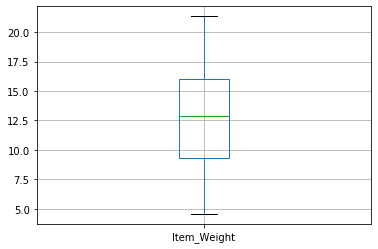

In [22]:
df.boxplot(column = ['Item_Weight'])
plt.show()

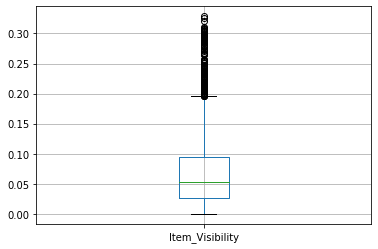

In [23]:
df.boxplot(column = ['Item_Visibility'])
plt.show()

In [24]:
def outlier_range(col):
    sorted(col)
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [25]:
low, high = outlier_range(df['Item_Visibility'])
print(low,high)
df = df[(df['Item_Visibility']>low) & (df['Item_Visibility']<high)]

-0.07440424500000001 0.195979015


In [26]:
df.shape

(8379, 12)

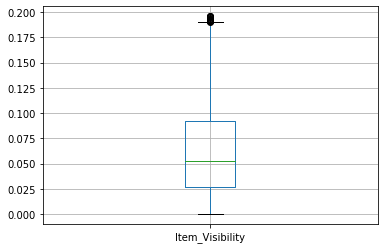

In [27]:
df.boxplot(column = ['Item_Visibility'])
plt.show()

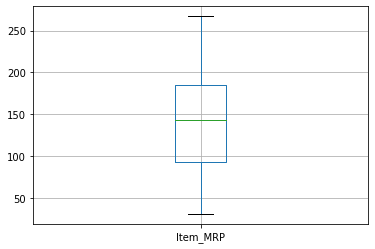

In [28]:
df.boxplot(column = ['Item_MRP'])
plt.show()

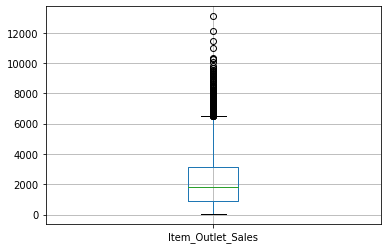

In [29]:
df.boxplot(column = ['Item_Outlet_Sales'])
plt.show()

In [30]:
df1 = df.copy()

In [31]:
low, high = outlier_range(df['Item_Outlet_Sales'])
print(low,high)
df = df[(df['Item_Outlet_Sales']>low) & (df['Item_Outlet_Sales']<high)]

-2499.7460999999994 6499.2067


In [32]:
df.shape

(8193, 12)

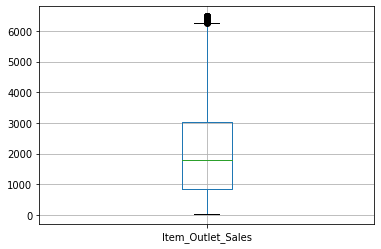

In [33]:
df.boxplot(column = ['Item_Outlet_Sales'])
plt.show()

# Univariate

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
import seaborn as sns

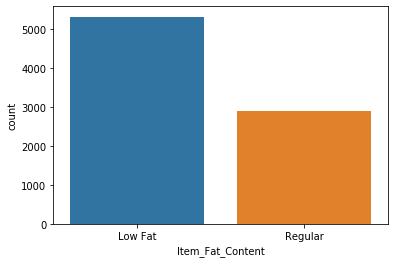

In [36]:
sns.countplot(df['Item_Fat_Content'])

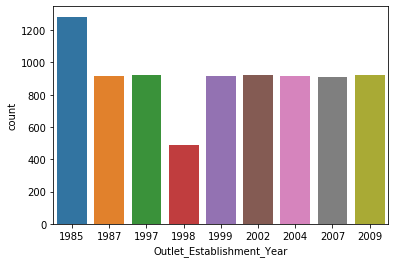

In [37]:
sns.countplot(df['Outlet_Establishment_Year'])

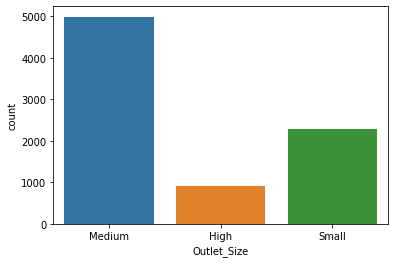

In [38]:
sns.countplot(df['Outlet_Size'])

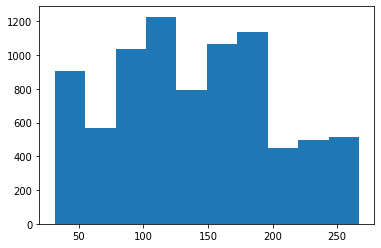

In [39]:
plt.hist(df['Item_MRP'])
plt.show()

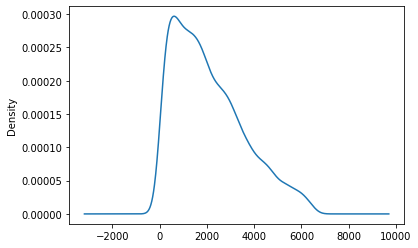

In [40]:
df['Item_Outlet_Sales'].plot(kind='density')

# Bivariate

In [41]:
df.shape

(8193, 12)

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


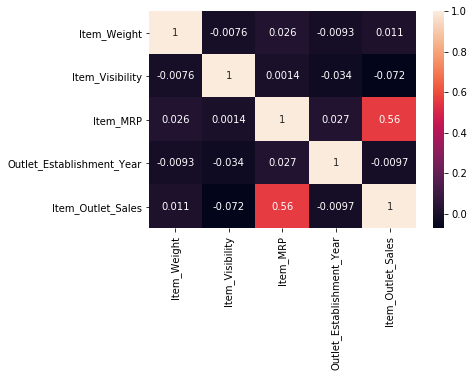

In [43]:
sns.heatmap(df.corr(), annot=True)

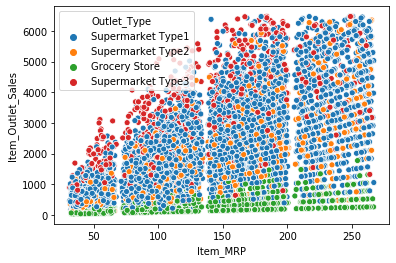

In [44]:
sns.scatterplot(x="Item_MRP",
       y= "Item_Outlet_Sales",
                hue = "Outlet_Type",
                data= df)

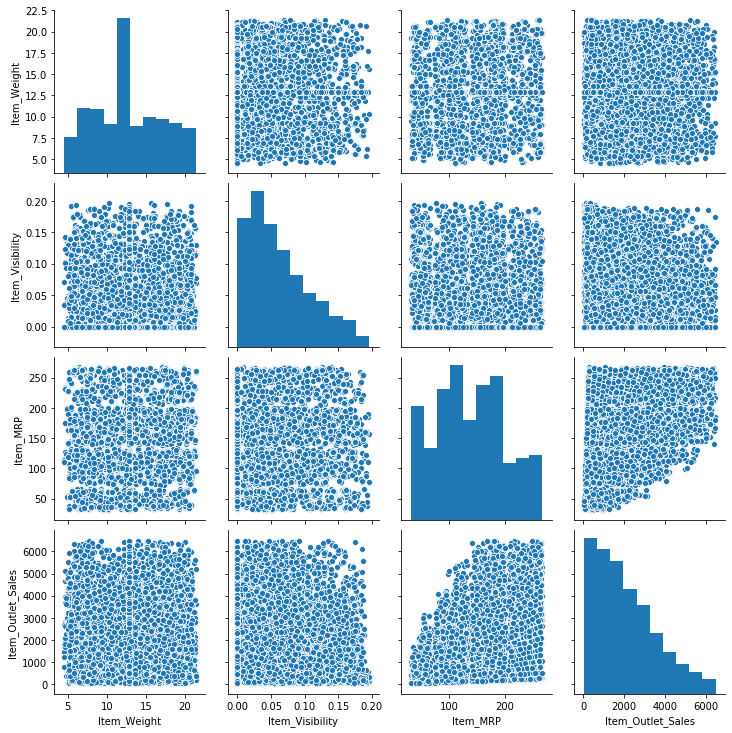

In [45]:
sns.pairplot(df, vars=[
"Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"])
plt.show()

# Feature Engineering and OneHot Encoding

In [46]:
Item_Type_freq = df['Item_Type'].value_counts(normalize=True)

df['Item_Type_freq'] = df['Item_Type'].apply(lambda x : Item_Type_freq[x])

print('The sum of Item_Type_freq variable:', sum(Item_Type_freq))
df[['Item_Type', 'Item_Type_freq']].head(6)

The sum of Item_Type_freq variable: 0.9999999999999999


,Item_Type,Item_Type_freq
0,Dairy,0.079214
1,Soft Drinks,0.052240
2,Meat,0.049921
3,Fruits and Vegetables,0.143415
4,Household,0.107043
5,Baking Goods,0.075918


In [47]:
df = pd.get_dummies(df, columns=['Outlet_Type'], drop_first=True)
df.head()
df.shape

(8193, 15)

In [48]:
df.shape

(8193, 15)

In [49]:
df.Outlet_Location_Type.value_counts()

Tier 3    3162
Tier 2    2741
Tier 1    2290
Name: Outlet_Location_Type, dtype: int64

In [50]:
df.Outlet_Size.value_counts()

Medium    4991
Small     2285
High       917
Name: Outlet_Size, dtype: int64

In [51]:
df = pd.get_dummies(df, columns=['Item_Fat_Content'], drop_first=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Regular
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,3735.1380,0.079214,1,0,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,443.4228,0.052240,0,1,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,2097.2700,0.049921,1,0,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,732.3800,0.143415,0,0,0,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,994.7052,0.107043,1,0,0,0


In [52]:
df = pd.get_dummies(df, columns=['Outlet_Size'], drop_first=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,3735.1380,0.079214,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,443.4228,0.052240,0,1,0,1,1,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,Tier 1,2097.2700,0.049921,1,0,0,0,1,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,732.3800,0.143415,0,0,0,1,1,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,Tier 3,994.7052,0.107043,1,0,0,0,0,0


In [53]:
df = pd.get_dummies(df, columns=['Outlet_Location_Type'], drop_first=True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,0.079214,1,0,0,0,1,0,0,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,0.052240,0,1,0,1,1,0,0,1
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,0.049921,1,0,0,0,1,0,0,0
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,0.143415,0,0,0,1,1,0,0,1
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,0.107043,1,0,0,0,0,0,0,1


In [54]:
df.drop(['Item_Type'], axis=1, inplace  =True)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,0.079214,1,0,0,0,1,0,0,0
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0.052240,0,1,0,1,1,0,0,1
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,0.049921,1,0,0,0,1,0,0,0
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0.143415,0,0,0,1,1,0,0,1
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,0.107043,1,0,0,0,0,0,0,1


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
encoder = LabelEncoder()

In [57]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

In [58]:
df.drop(['Item_Identifier'], axis=1, inplace  =True)
df.drop(['Outlet_Identifier'], axis=1, inplace  =True)

In [59]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_freq,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,0.016047,249.8092,1999,3735.1380,0.079214,1,0,0,0,1,0,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0.052240,0,1,0,1,1,0,0,1
2,17.50,0.016760,141.6180,1999,2097.2700,0.049921,1,0,0,0,1,0,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0.143415,0,0,0,1,1,0,0,1
4,8.93,0.000000,53.8614,1987,994.7052,0.107043,1,0,0,0,0,0,0,1


# ML Models

In [60]:
X = df.drop(columns = "Item_Outlet_Sales", axis = 1)
Y = df["Item_Outlet_Sales"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#splitting the given train data set into train and test

In [63]:
from sklearn.linear_model import LinearRegression

In [87]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
predicted = linearmodel.predict(X_test)

In [89]:
from sklearn import metrics
r2_train = metrics.r2_score(Y_test, predicted)
r2_train

0.5460126648635537

In [90]:
linearmodel.score(X_test, Y_test)

0.5460126648635537

In [91]:
linearmodel.score(X_train, Y_train)

0.5507336647263852

In [92]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol = 0.1)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [93]:
lasso_reg.score(X_train, Y_train)

0.46886954434727046

In [94]:
lasso_reg.score(X_test, Y_test)

0.4632466412583165

In [95]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha = 50, max_iter = 100, tol = 0.1)
ridge_reg.fit(X_train, Y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.1)

In [97]:
ridge_reg.score(X_train, Y_train)

0.5419277333199076

In [96]:
ridge_reg.score(X_test, Y_test)

0.5371224761598624

In [98]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor(n_estimators = 40)
rfmodel.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [99]:
rfmodel.score(X_train, Y_train)

0.9281056188548075

In [100]:
rfmodel.score(X_test, Y_test)

0.5091088873179259

In [101]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_estimators = 500)
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [104]:
regressor.score(X_test, Y_test)

0.45039286293070735

In [105]:
regressor.score(X_train, Y_train)

0.9827848895334768

In [102]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, Y_train, 
             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=4, num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [103]:
my_model.score(X_test, Y_test)

0.5097049070357922

In [106]:
my_model.score(X_train, Y_train)

0.8907071288438787

In [107]:
df1 = pd.read_csv("Test.csv")
df1.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [108]:
df1['Item_Weight'] = df1['Item_Weight'].fillna(df1['Item_Weight'].mean())

In [109]:
df1['Outlet_Size'] = df1['Outlet_Size'].replace(np.nan, df1['Outlet_Size'].mode().values[0])

In [110]:
df1.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [111]:
df1 = df1.replace(to_replace=["LF", "low fat"],
           value="Low Fat")
df1 = df1.replace(to_replace=["reg"],
           value="Regular")

In [112]:
Item_Type_freq = df1['Item_Type'].value_counts(normalize=True)

df1['Item_Type_freq'] = df1['Item_Type'].apply(lambda x : Item_Type_freq[x])

In [113]:
df1 = pd.get_dummies(df1, columns=['Outlet_Type'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Item_Fat_Content'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Outlet_Size'], drop_first=True)
df1 = pd.get_dummies(df1, columns=['Outlet_Location_Type'], drop_first=True)
df1.drop(['Item_Type'], axis=1, inplace  =True)
df1.drop(['Item_Identifier'], axis=1, inplace  =True)
df1.drop(['Outlet_Identifier'], axis=1, inplace  =True)

In [115]:
x = df1
predicted = linearmodel.predict(x)

In [116]:
print(predicted)

[1785.45571645 1639.39082404 1753.5432819  ... 1792.47411868 3431.43860661
 1294.92505715]


In [117]:
lasso_reg.predict(x)

array([1708.77836568, 1548.25969541, 2972.09422664, ..., 1908.58499566,
       3329.17483335, 1363.71466533])

In [118]:
ridge_reg.predict(x)

array([1735.42551818, 1584.96140232, 2186.39339066, ..., 1893.1380304 ,
       3365.74870762, 1401.93924095])

In [120]:
rfmodel.predict(x)

array([1696.807945, 1458.817735,  625.069685, ..., 1980.88816 ,
       4689.745395, 1739.80198 ])

In [121]:
regressor.predict(x)

array([ 884.4286, 1563.844 , 1356.5677, ..., 1750.4641, 4213.792 ,
       1930.9185], dtype=float32)

In [122]:
my_model.predict(x)

array([1482.3494 , 1513.2784 ,  970.15796, ..., 1704.0767 , 4649.3433 ,
       1587.0245 ], dtype=float32)